In [3]:
import cv2
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import json

# Check if synthetic semantic masks match USDA 

## Upload Species Info use in Pipeline

In [55]:
species_info = "/home/psa_images/SemiF-AnnotationPipeline/data/semifield-utils/species_information/species_info.json"
with open(species_info) as f:
    s = json.load(f)

## Compare synthetic masks with expected color

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


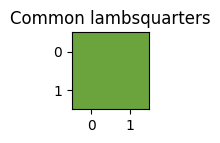

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


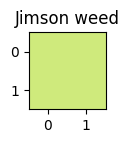

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


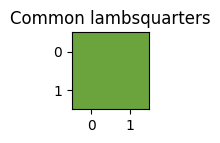

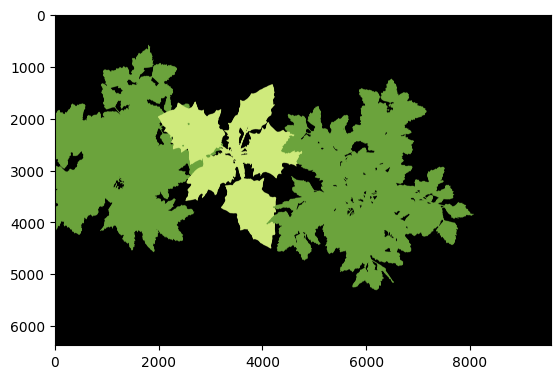

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


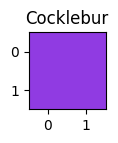

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


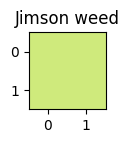

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


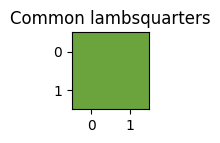

True RGB:  [29, 104, 110]
Pred RGB:  [29, 104, 110]


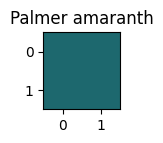

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


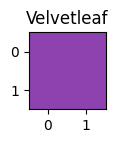

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


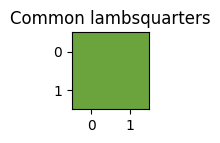

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


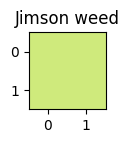

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


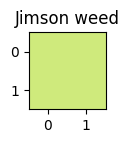

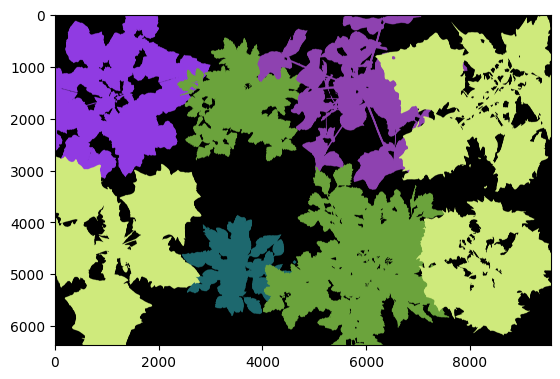

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


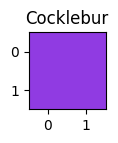

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


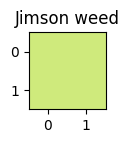

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


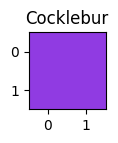

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


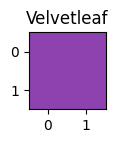

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


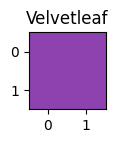

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


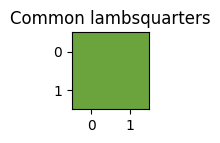

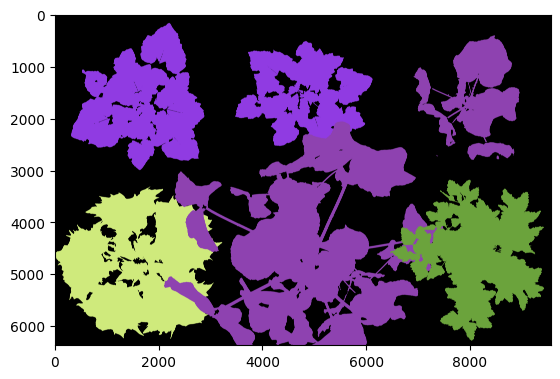

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


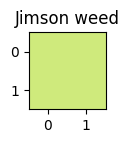

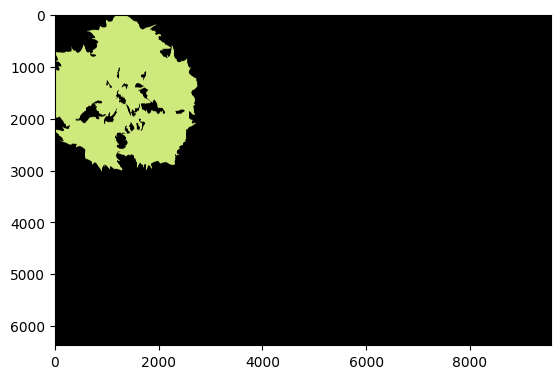

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


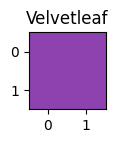

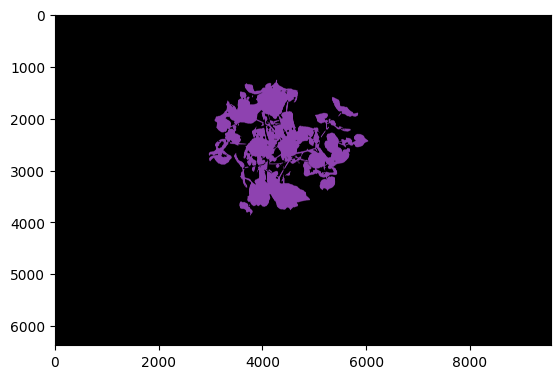

True RGB:  [29, 104, 110]
Pred RGB:  [29, 104, 110]


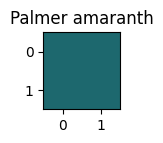

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


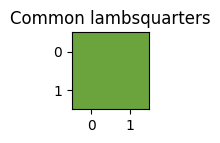

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


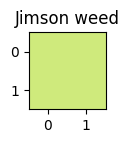

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


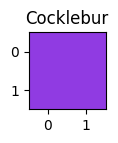

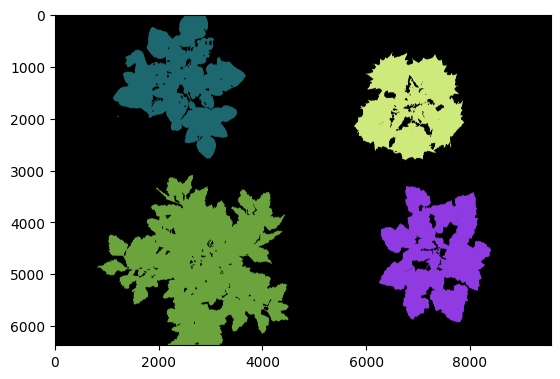

True RGB:  [29, 104, 110]
Pred RGB:  [29, 104, 110]


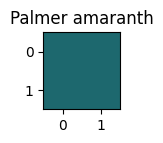

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


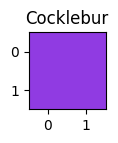

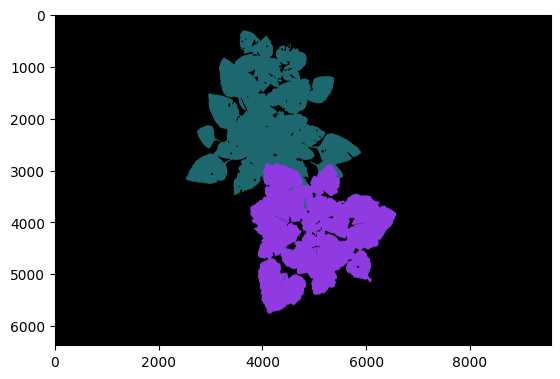

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


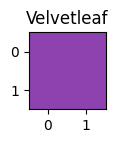

True RGB:  [107, 163, 60]
Pred RGB:  [107, 163, 60]


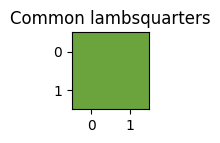

True RGB:  [142, 66, 176]
Pred RGB:  [142, 66, 176]


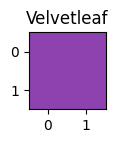

True RGB:  [207, 234, 124]
Pred RGB:  [207, 234, 124]


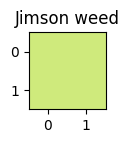

True RGB:  [144, 59, 226]
Pred RGB:  [144, 59, 226]


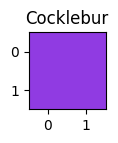

In [57]:
maskps = Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/masks").glob("*.png")
metaps = Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/metadata").glob("*.json")

for jpath in metaps:
    with open(jpath) as f:
        j = json.load(f)
        cuts = j["cutouts"]
        for cut in cuts:
            usda = cut["cls"]["USDA_symbol"]
            # True color from species info
            true_rgb = s["species"][usda]["rgb"]
            # Color from synth image metadata
            pred_rgb = cut["cls"]["rgb"]
            # Print results
            print("True RGB: ",true_rgb)
            print("Pred RGB: ", pred_rgb)
            # Show true color to make sure it matches with synth image color
            samp = np.ones((2,2,3))
            samp = np.where(samp == 1, true_rgb, 0)
            plt.figure(figsize=(1,1))
            plt.imshow(samp)
            plt.title(cut["cls"]["common_name"])
            plt.show()
    # Load mask
    imgp = Path(Path("/home/mkutuga/SemiF-SyntheticPipeline/data/projects/very_big/results/masks"), Path(jpath).stem + ".png")
    # Convert to RGB from BGR
    img = cv2.cvtColor(cv2.imread(str(imgp)), cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()
    
            